Total number of murders involving black victims found in database: 299899


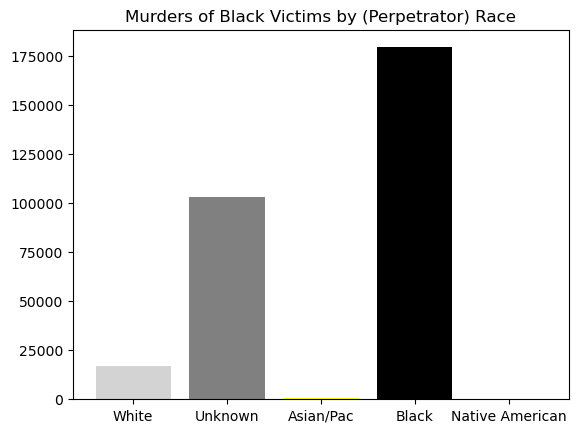

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

murder_data = pd.read_csv("database.csv", low_memory=False)

murder_data.rename(columns={"Record ID":"Record_ID","Agency Code":"Agency_Code","Agency Name":"Agency_Name","Agency Type":"Agency_Type","Crime Type":"Crime_Type",
                   "Crime Solved":"Crime_Solved", "Victim Sex":"Victim_sex", "Victim Age":"Victim_Age","Victim Ethnicity":"Victim_Ethnicity","Victim Race":"Victim_Race",
                   "Perpetrator Age":"Perpetrator_Age","Perpetrator Sex":"Perpetrator_Sex","Perpetrator Race":"Perpetrator_Race","Perpetrator Ethnicity":"Perpetrator_Ethnicity","Victim Count":"Victim_Count",
                   "Perpetrator Count":"Perpetrator_Count", "Record Source":"Record_Source"},inplace=True)


# total amount of black victims in murder database
black_victims = murder_data[murder_data["Victim_Race"] == "Black"].shape[0]
print("Total number of murders involving black victims found in database:", black_victims)

# amount of white people guilty of the murder of a black individual
white_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "White") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is white and the victim is black:", black_perp_white_vic)

# amount of black murders where the race of the perp is unknown
unknown_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Unknown") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the race of the perp is unknown and the victim is black:", unknown_perp_black_vic)

# amount of black murders where the race of the perp is asian
asian_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Asian/Pacific Islander") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is asian/pacific and the victim is black:", asian_perp_black_vic)

# amount of black people murdered by native american
native_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Native American/Alaska Native") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is native american and the victim is black:", native_perp_black_vic)

# amount of black people killing black people
black_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Black") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is black and the victim is black:", black_perp_black_vic)


labels = ["White", "Unknown", "Asian/Pac", "Black", "Native American"]
values = [white_perp_black_vic, unknown_perp_black_vic, asian_perp_black_vic, black_perp_black_vic, native_perp_black_vic]

# graph title and labels for axis
plt.title("Murders of Black Victims by (Perpetrator) Race")
plt.xlabel("")
plt.ylabel("")

# bar charts
plt.bar(labels, values, color=["lightgray", "gray", "yellow", "black", "red"])

# show graph
plt.show()


              precision    recall  f1-score   support

           0       0.40      0.63      0.49       645
           1       0.60      0.83      0.70     21461
           2       0.41      0.55      0.47       332
           3       0.68      0.02      0.04     19704
           4       0.62      0.91      0.73     21704

    accuracy                           0.60     63846
   macro avg       0.54      0.59      0.49     63846
weighted avg       0.63      0.60      0.50     63846

the decision tree classifier model with the current specifications has roughly 60.41% accuracy in predicting killer's race based on the victim's race

Number of mislabeled murders out of a total 63846 murders: 25279

model predictions took 0.06 seconds to compute.


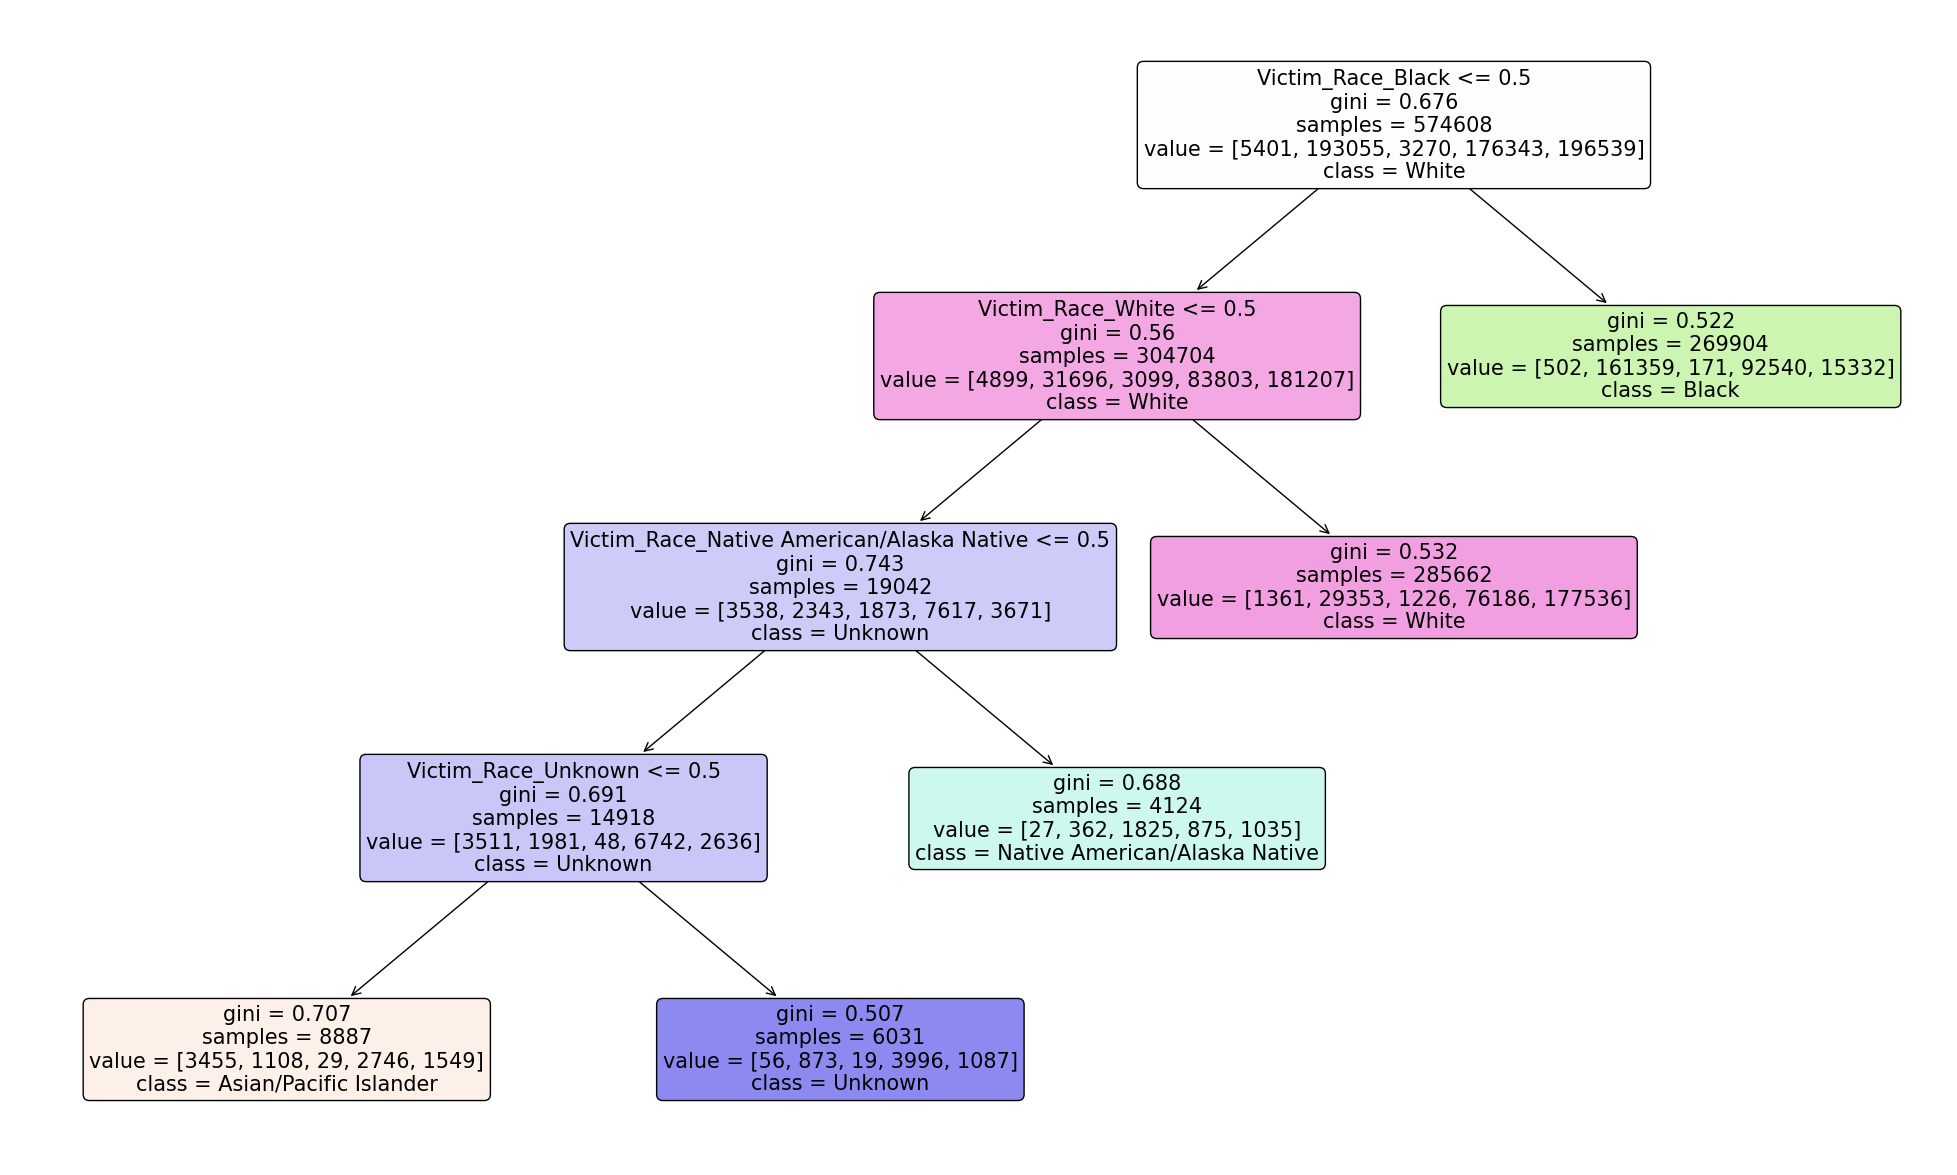

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time


"""This is a script that trains a Decision Tree Classifier on a dataset of murder records""" 
"""to predict the race of a murderer based on the race of their victim."""

# import data
murder_data = pd.read_csv('database.csv', low_memory=False)

# clean the data
murder_data.rename(columns={"Record ID":"Record_ID","Agency Code":"Agency_Code","Agency Name":"Agency_Name","Agency Type":"Agency_Type","Crime Type":"Crime_Type",
                   "Crime Solved":"Crime_Solved", "Victim Sex":"Victim_sex", "Victim Age":"Victim_Age","Victim Ethnicity":"Victim_Ethnicity","Victim Race":"Victim_Race",
                   "Perpetrator Age":"Perpetrator_Age","Perpetrator Sex":"Perpetrator_Sex","Perpetrator Race":"Perpetrator_Race","Perpetrator Ethnicity":"Perpetrator_Ethnicity","Victim Count":"Victim_Count",
                   "Perpetrator Count":"Perpetrator_Count", "Record Source":"Record_Source"},inplace=True)



# split the data set into in- and output. in this case Victim Race and Perpetrator Race
# races are "White", "Black", "Unknown", "Asian/Pacific Islander" and "Native American/Alaska Native"
# encode data for races so it can be used by the machine learning algorithm
enc = LabelEncoder()
X = pd.get_dummies(murder_data[["Victim_Race"]])
y = enc.fit_transform(murder_data["Perpetrator_Race"])

# split data into training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

#time the model 
start = time.time()

# create a model
model = DecisionTreeClassifier()

# train the model
model.fit(X_train, y_train)

# make prediction using data reserved for testing
predictions = model.predict(X_test)

end = time.time()

duration = end - start

# evaluate (and improve)
dtc_score = accuracy_score(y_test, predictions)

# accuracy score in percentage
report = classification_report(y_test, predictions)
print(report)
print(f"the decision tree classifier model with the current specifications has roughly {100*dtc_score:,.2f}% accuracy in predicting killer's race based on the victim's race\n")

print("Number of mislabeled murders out of a total %d murders: %d"
      % (X_test.shape[0], (y_test != predictions).sum()))

print()
print(f"model predictions took {duration:.2f} seconds to compute.")

# visualize decision tree
plt.figure(figsize=(25, 15))
plot_tree(model, feature_names=X.columns, class_names=enc.classes_, filled=True, rounded=True)
plt.show()





              precision    recall  f1-score   support

           0       0.40      0.64      0.49       939
           1       0.60      0.84      0.70     32338
           2       0.44      0.51      0.47       551
           3       0.64      0.02      0.04     29266
           4       0.62      0.90      0.74     32675

    accuracy                           0.61     95769
   macro avg       0.54      0.58      0.49     95769
weighted avg       0.62      0.61      0.51     95769

the random forest classifier model with the current specifications has roughly 60.60% accuracy in predicting killer's race based on the victim's race

Number of mislabeled murders out of a total 95769 murders: 37732

model predictions took 6.29 seconds to compute.


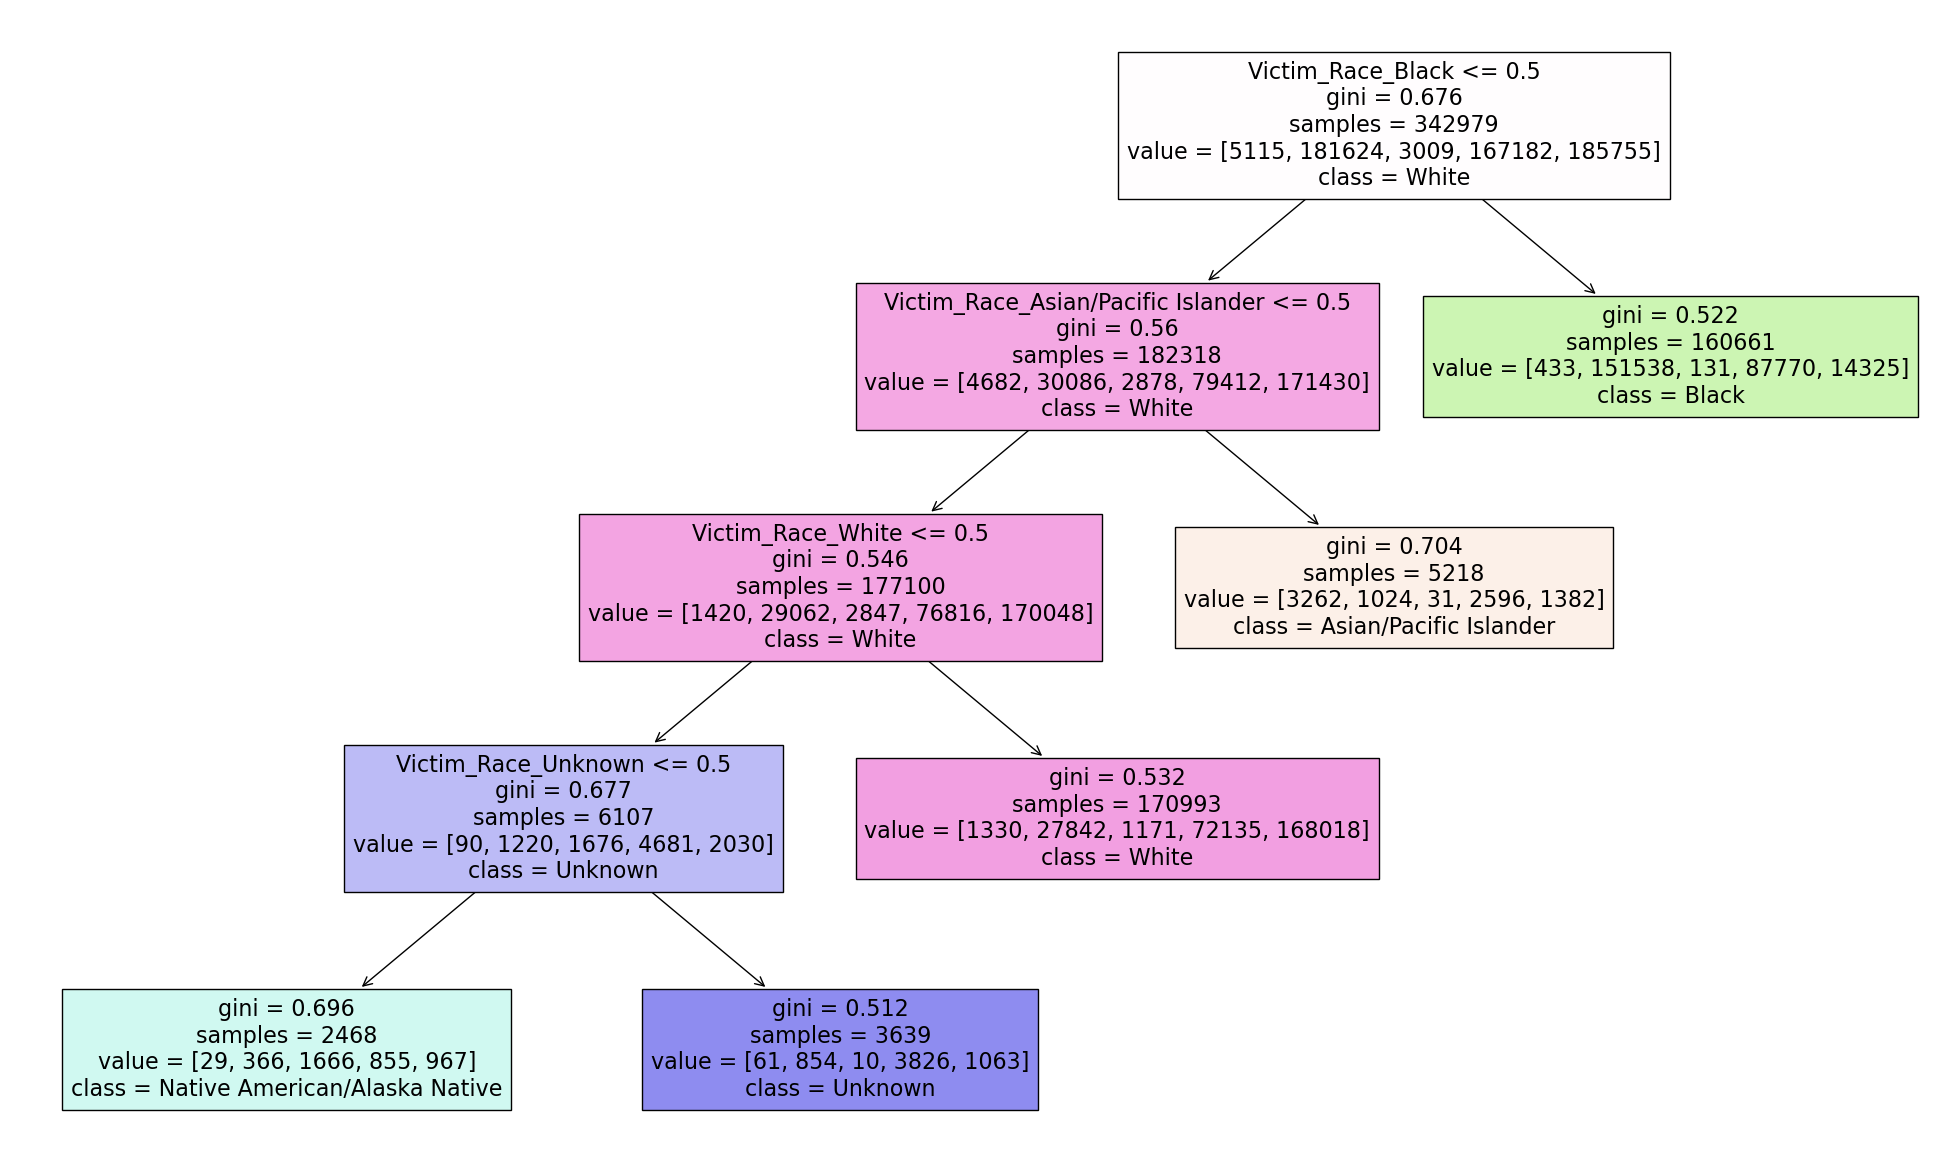

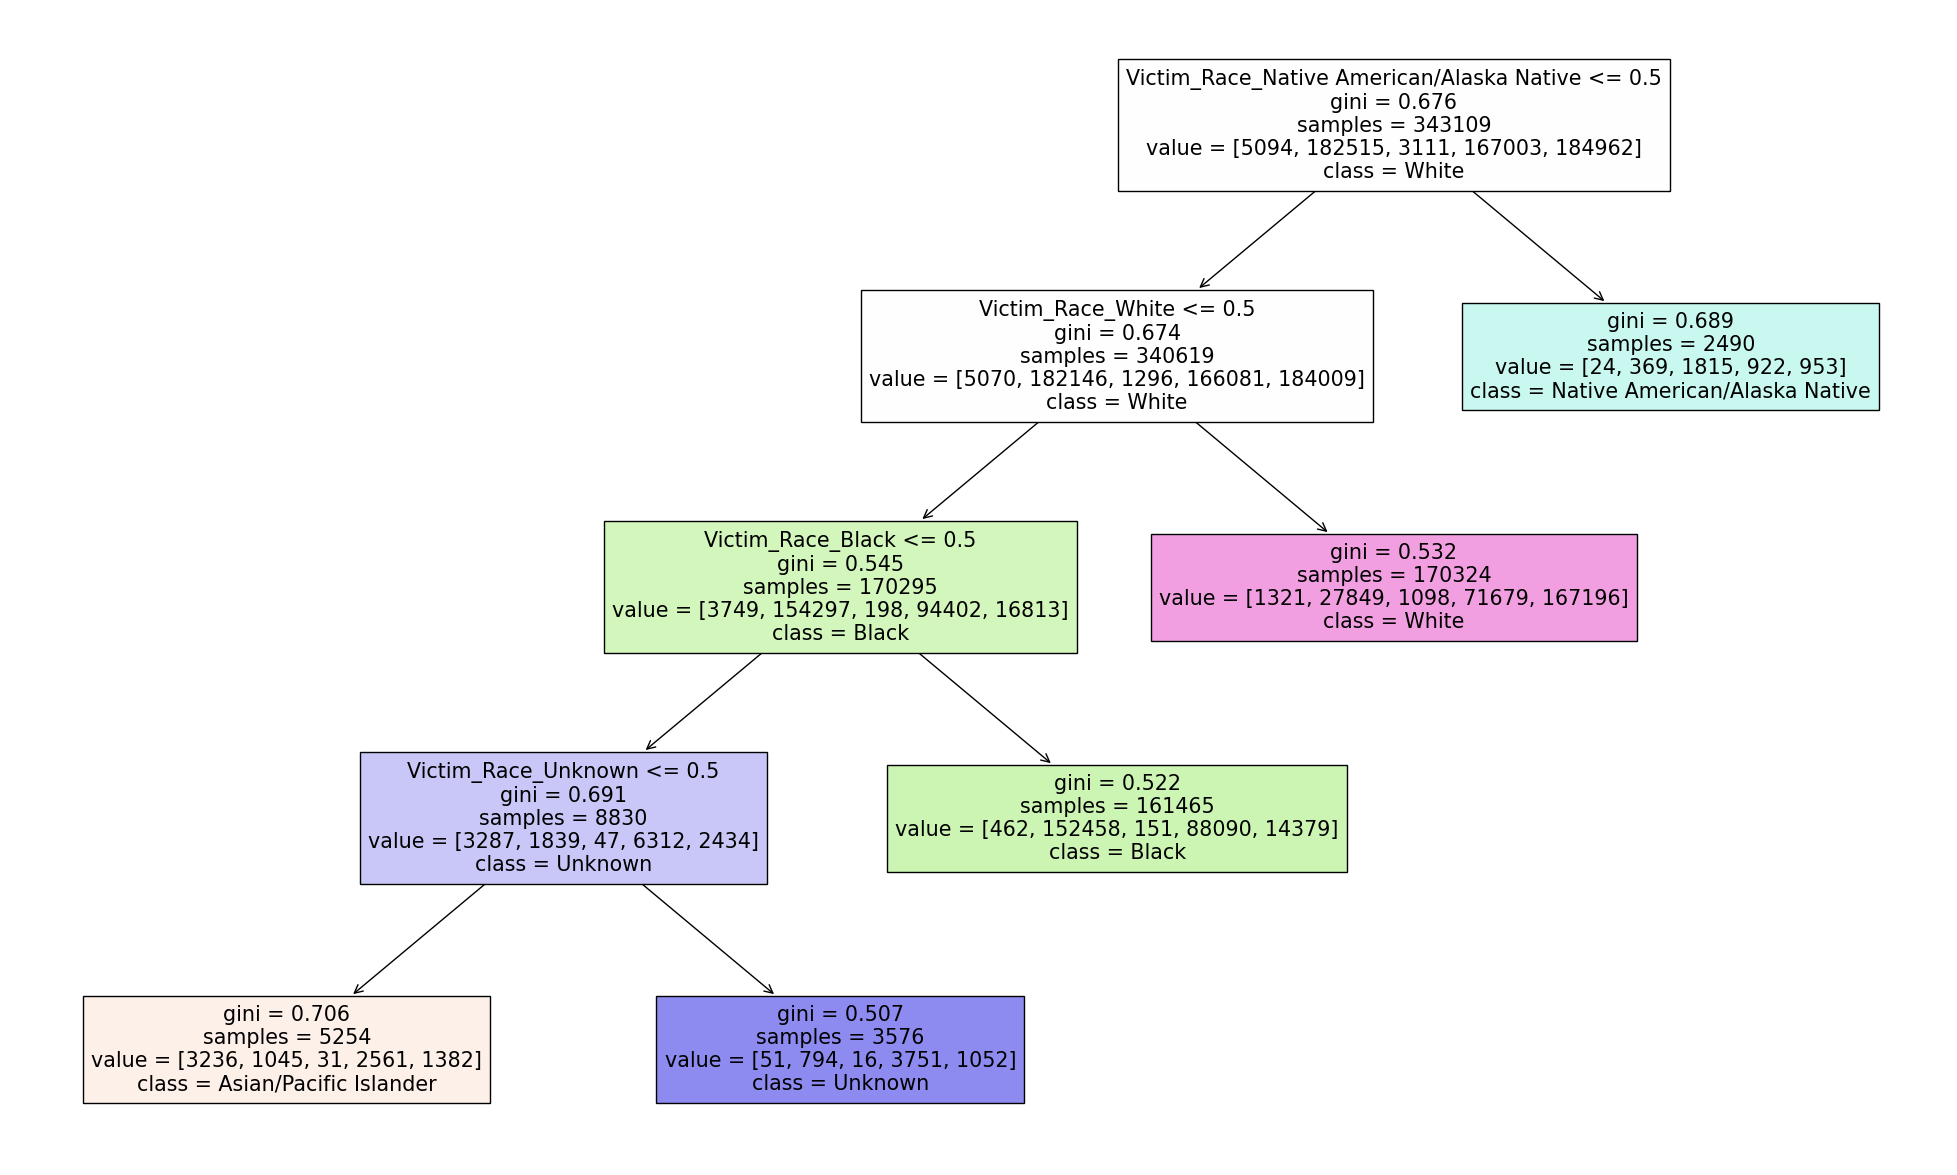

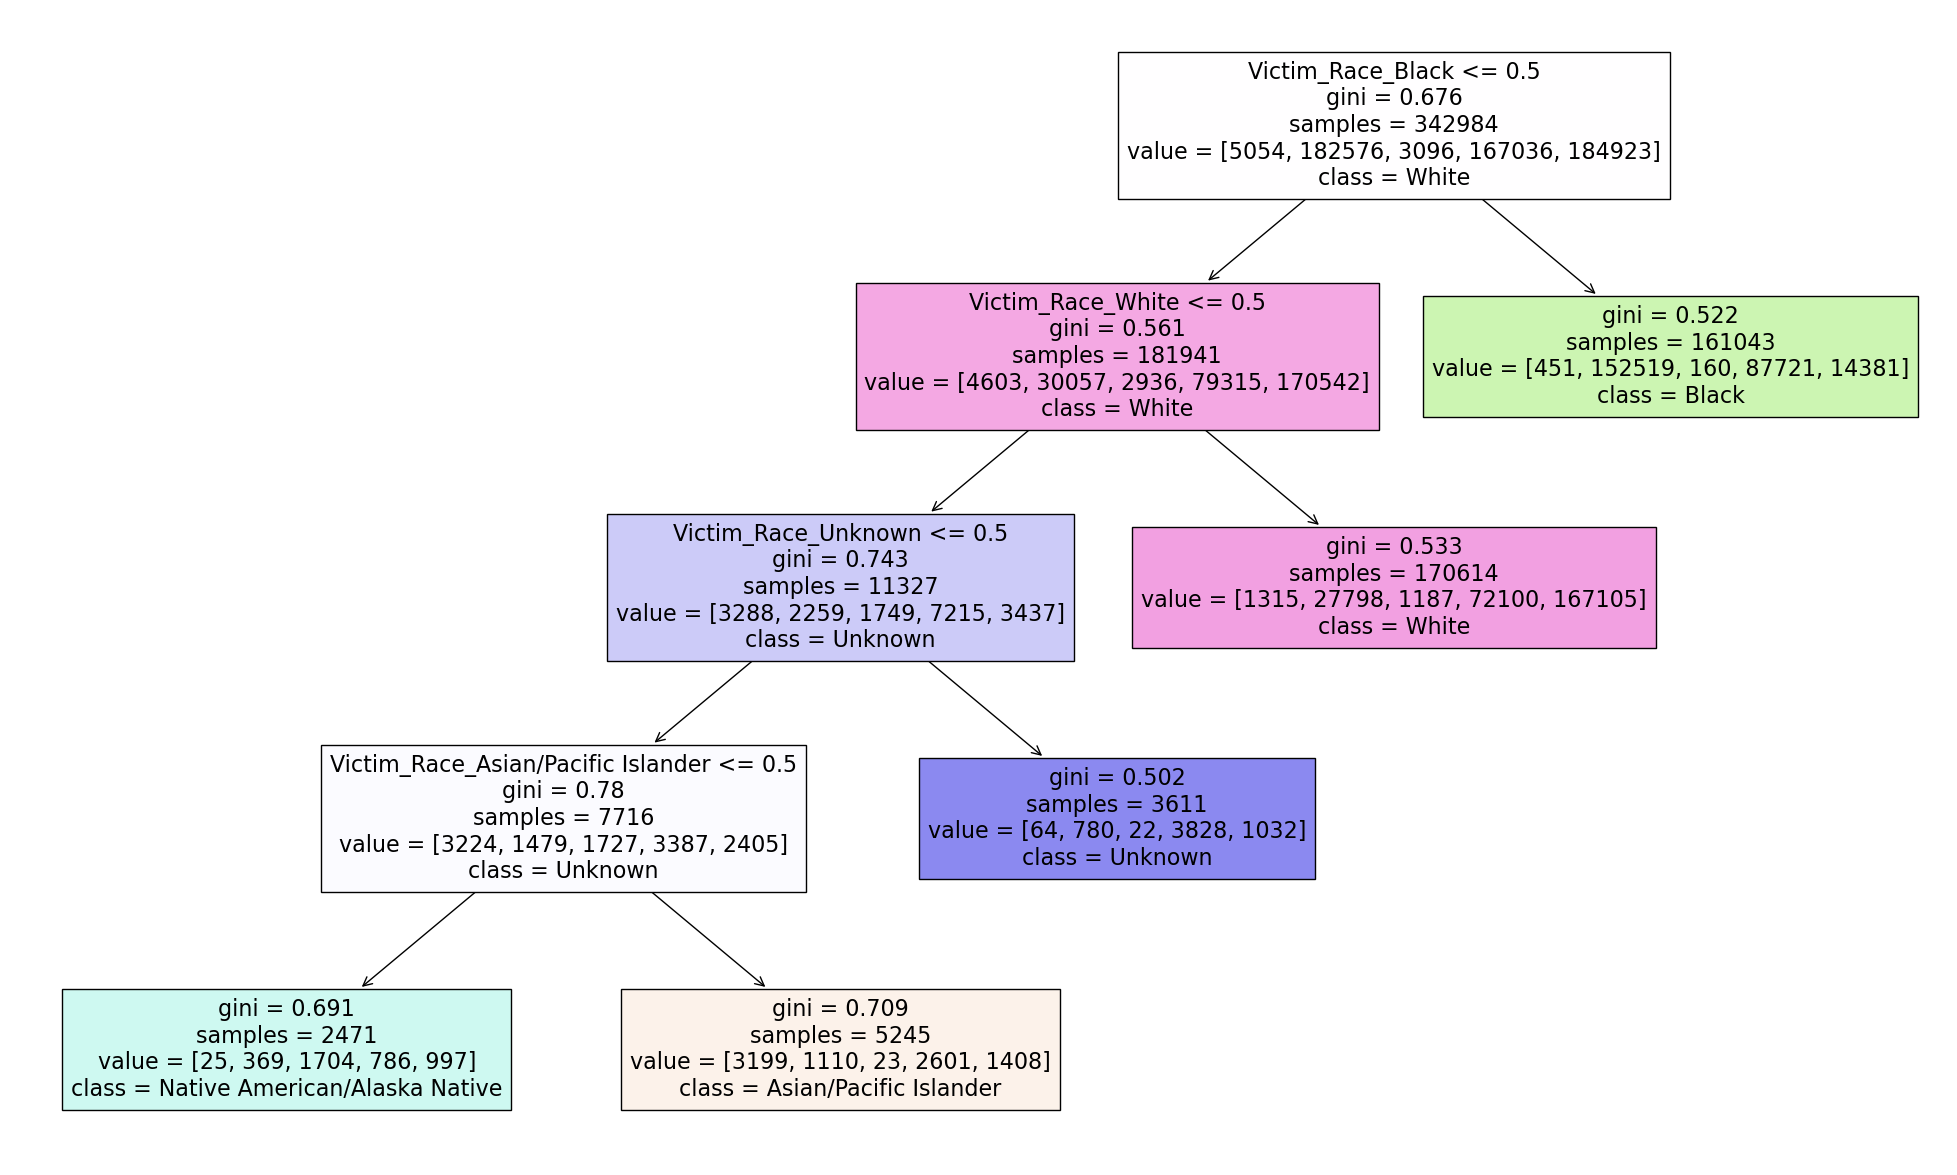

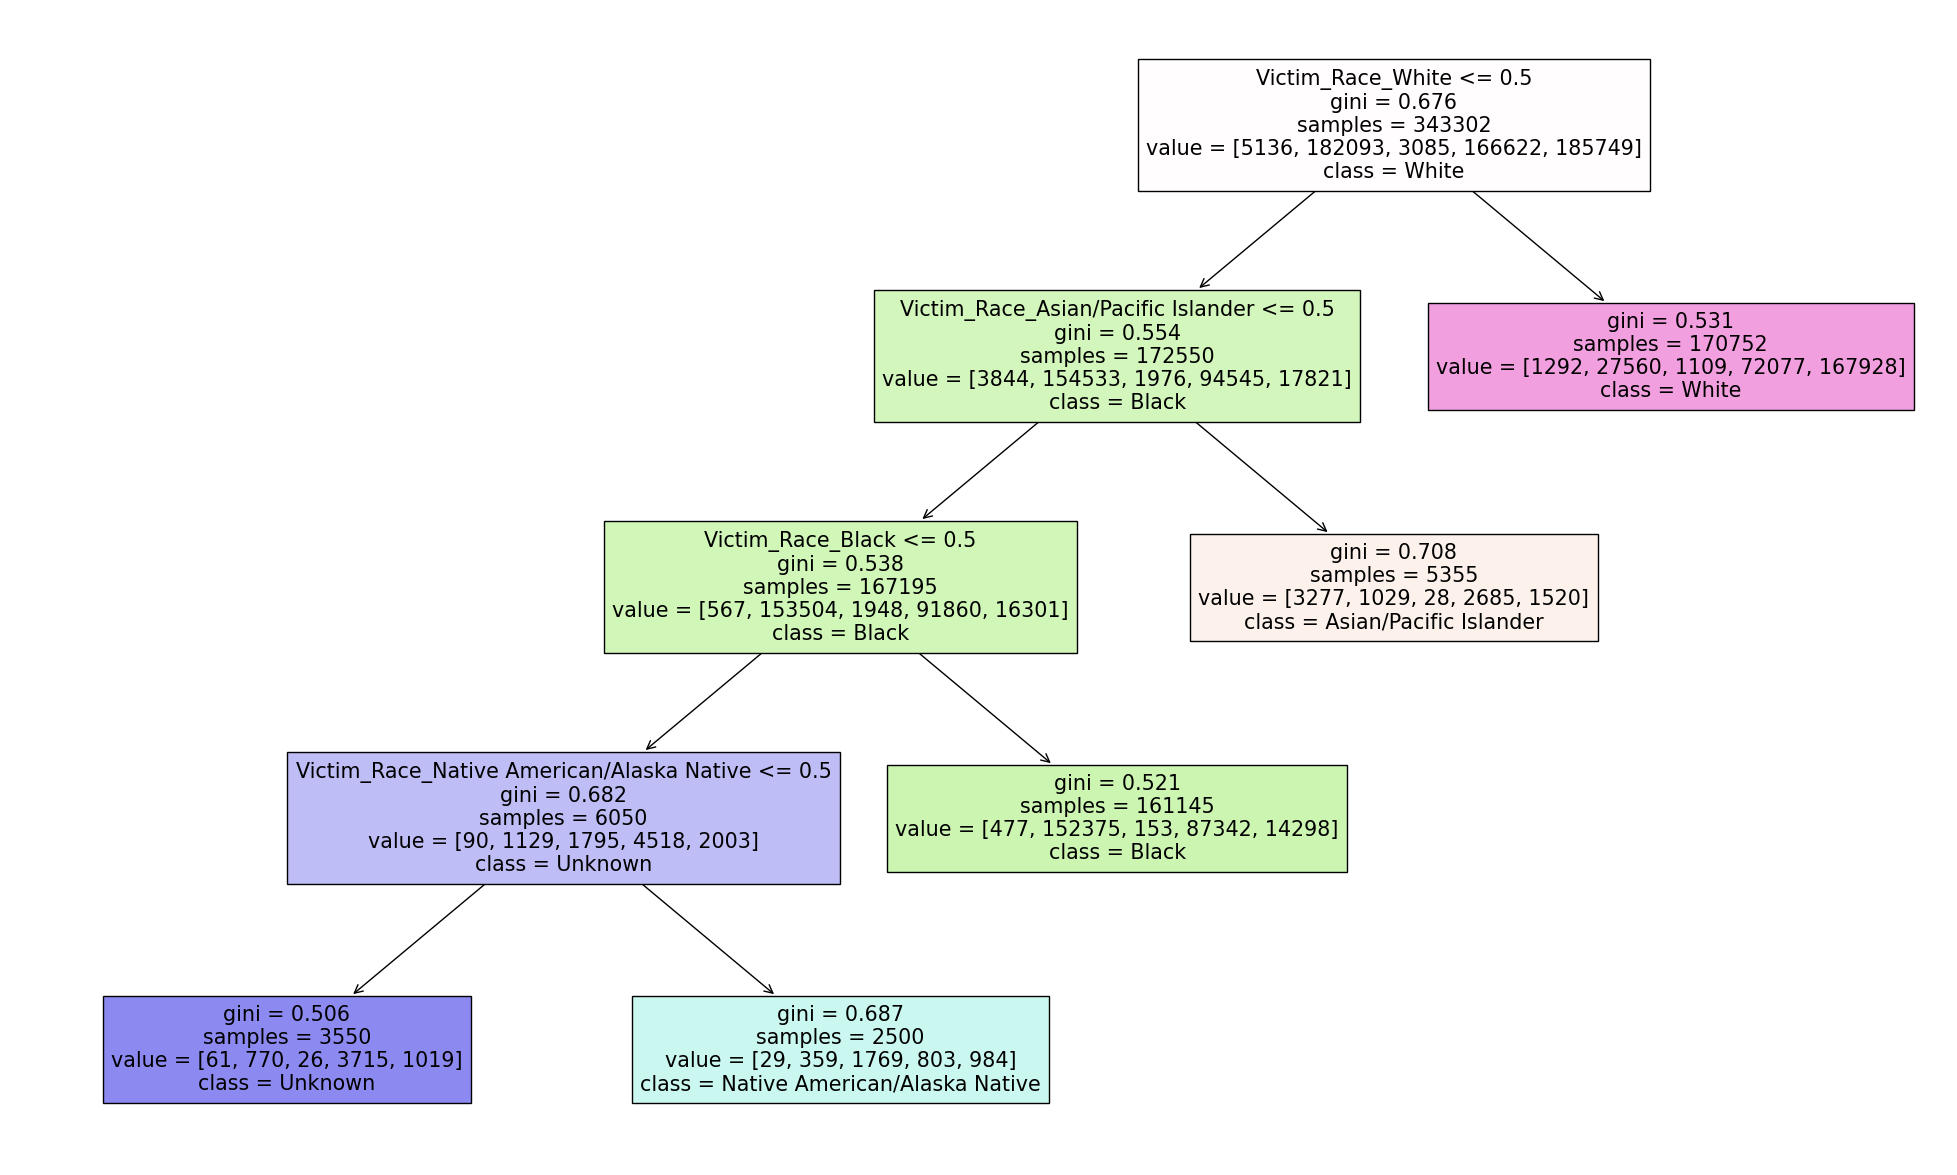

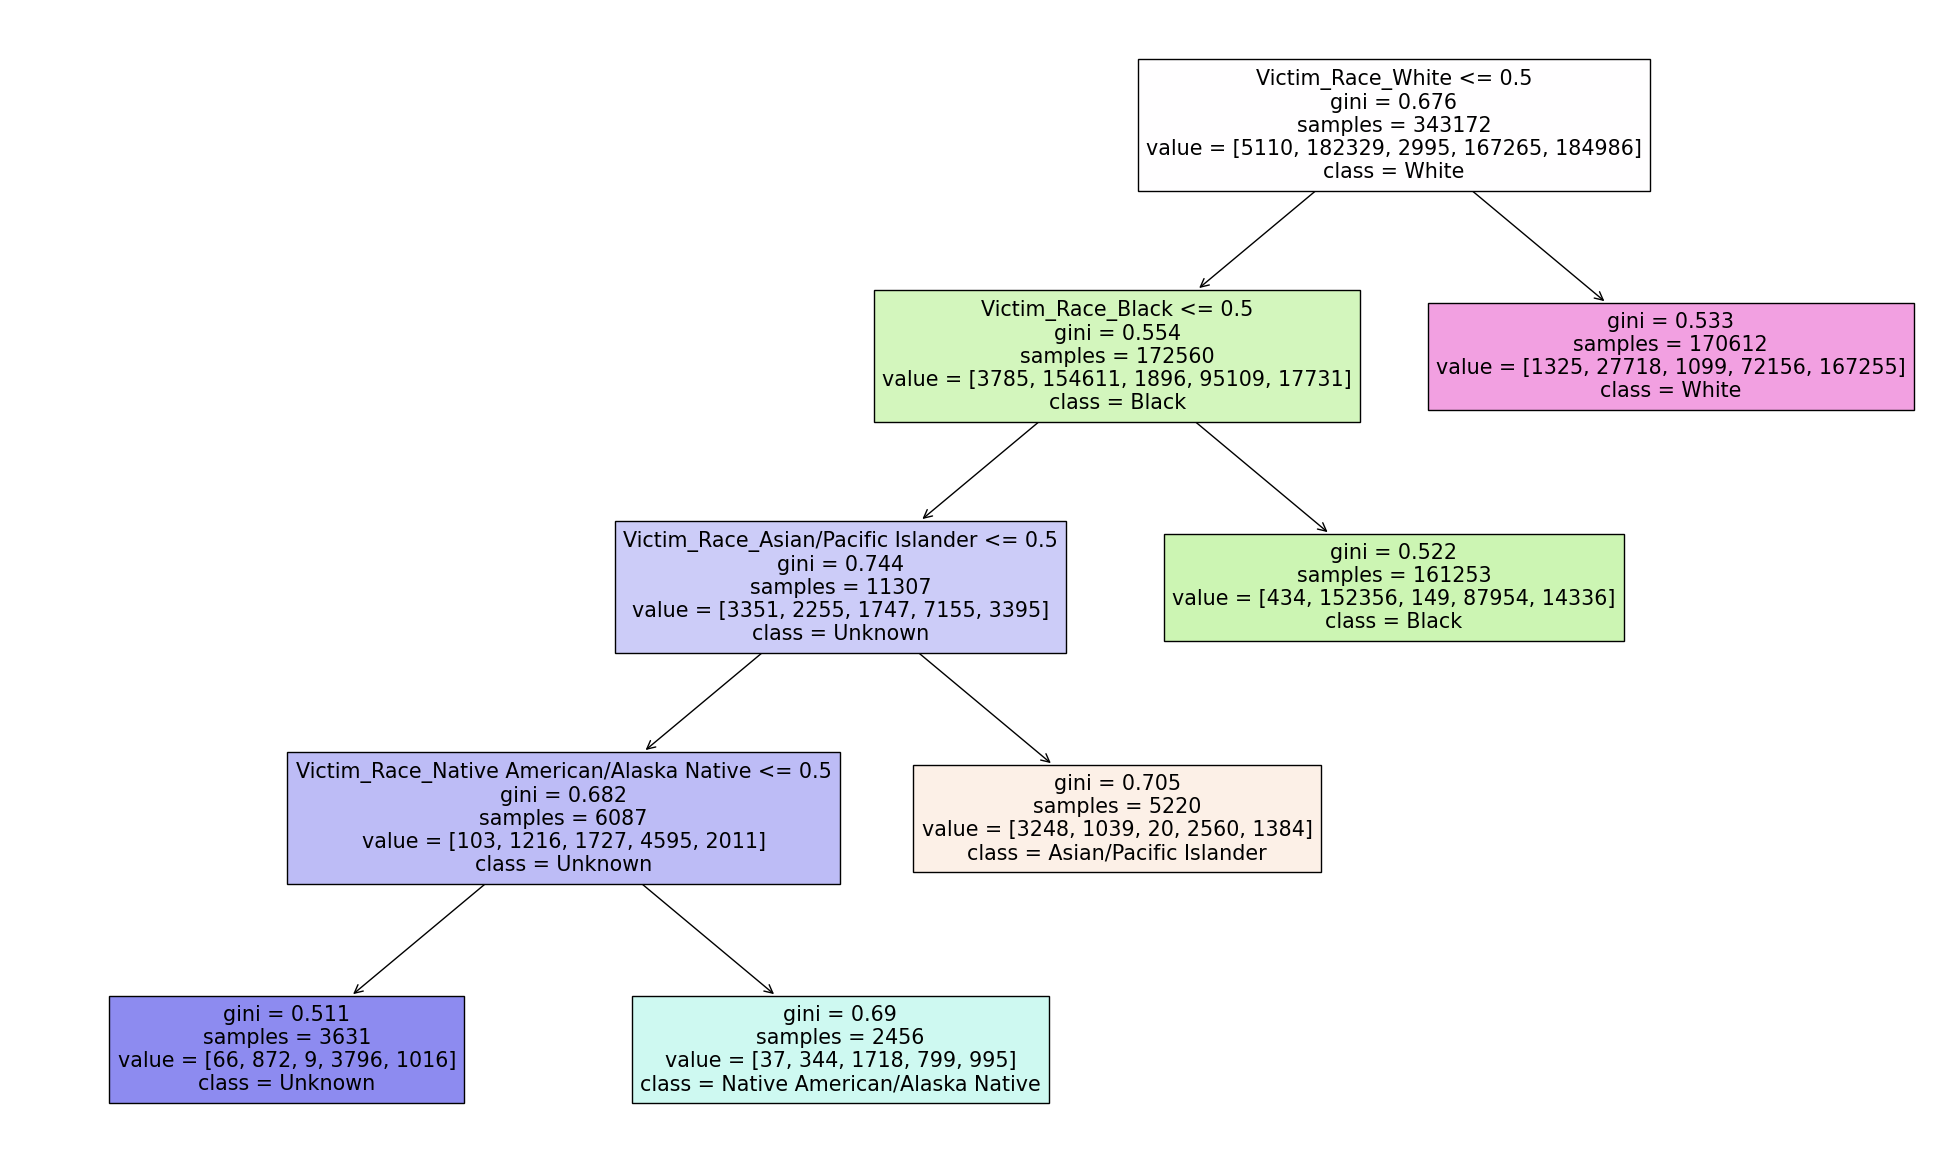

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import time


"""Random Forest Classifier script"""

murder_data = pd.read_csv("database.csv", low_memory=False)

murder_data.rename(columns={"Record ID":"Record_ID","Agency Code":"Agency_Code","Agency Name":"Agency_Name","Agency Type":"Agency_Type","Crime Type":"Crime_Type",
                   "Crime Solved":"Crime_Solved", "Victim Sex":"Victim_sex", "Victim Age":"Victim_Age","Victim Ethnicity":"Victim_Ethnicity","Victim Race":"Victim_Race",
                   "Perpetrator Age":"Perpetrator_Age","Perpetrator Sex":"Perpetrator_Sex","Perpetrator Race":"Perpetrator_Race","Perpetrator Ethnicity":"Perpetrator_Ethnicity","Victim Count":"Victim_Count",
                   "Perpetrator Count":"Perpetrator_Count", "Record Source":"Record_Source"},inplace=True)

enc = LabelEncoder()
X = pd.get_dummies(murder_data[["Victim_Race"]])
y = enc.fit_transform(murder_data["Perpetrator_Race"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

start = time.time()

# using a random forest classifier this time 
model = RandomForestClassifier(max_depth=5, random_state=0)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

end = time.time()

duration = end - start

rfc_score = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(report)
print(f"the random forest classifier model with the current specifications has roughly {100*rfc_score:,.2f}% accuracy in predicting killer's race based on the victim's race\n")
print("Number of mislabeled murders out of a total %d murders: %d"
      % (X_test.shape[0], (y_test != predictions).sum()))

print()

print(f"model predictions took {duration:.2f} seconds to compute.")

# graphs of the random forest classifier trees
est = model.estimators_
 
# plotting the first 5 decision trees (when using len(est), there are an overwhelming amount of trees)
for i in range(5):
    plt.figure(figsize=(25,15))
    plot_tree(est[i], feature_names=X.columns, class_names=enc.classes_, filled=True)
    plt.show()





              precision    recall  f1-score   support

           0       0.40      0.64      0.49      1231
           1       0.60      0.84      0.70     42934
           2       0.45      0.56      0.50       733
           3       0.67      0.02      0.04     39141
           4       0.62      0.90      0.74     43652

    accuracy                           0.61    127691
   macro avg       0.55      0.59      0.49    127691
weighted avg       0.63      0.61      0.51    127691

the Gaussian NB model has roughly 60.72% accuracy in predicting killer's race based on the victim's race

Number of mislabeled murders out of a total 127691 murders: 50153

model predictions took 0.09 seconds to compute.


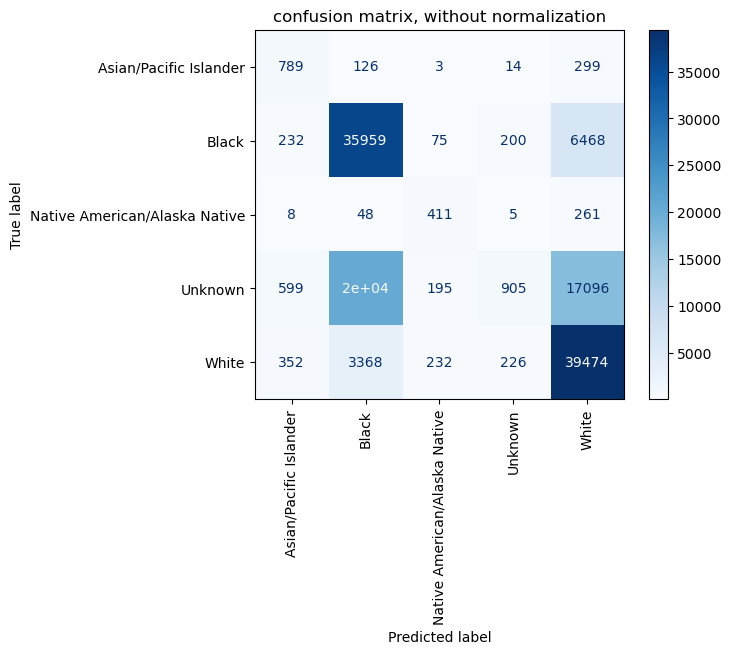

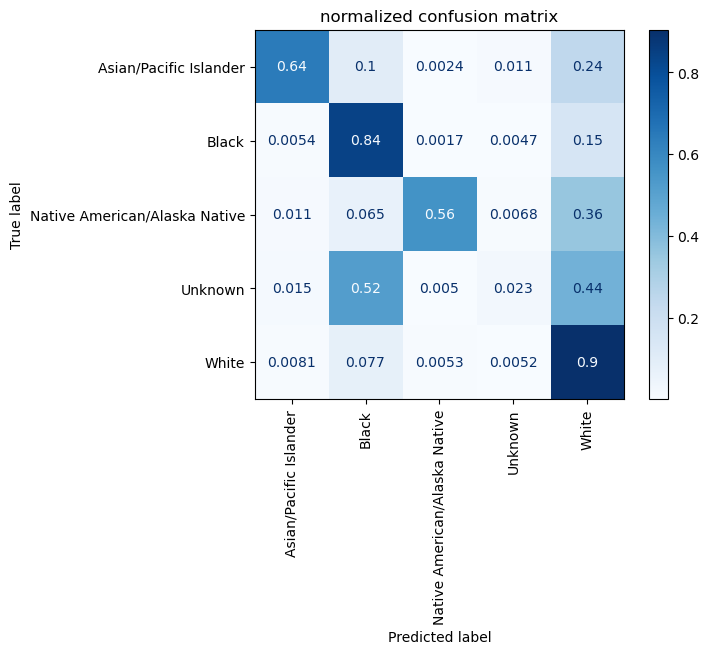

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, accuracy_score, recall_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import time

 
"""Gaussian Naive Bayes model training script"""

murder_data = pd.read_csv("database.csv", low_memory=False)

murder_data.rename(columns={"Record ID":"Record_ID","Agency Code":"Agency_Code","Agency Name":"Agency_Name","Agency Type":"Agency_Type","Crime Type":"Crime_Type",
                   "Crime Solved":"Crime_Solved", "Victim Sex":"Victim_sex", "Victim Age":"Victim_Age","Victim Ethnicity":"Victim_Ethnicity","Victim Race":"Victim_Race",
                   "Perpetrator Age":"Perpetrator_Age","Perpetrator Sex":"Perpetrator_Sex","Perpetrator Race":"Perpetrator_Race","Perpetrator Ethnicity":"Perpetrator_Ethnicity","Victim Count":"Victim_Count",
                   "Perpetrator Count":"Perpetrator_Count", "Record Source":"Record_Source"},inplace=True)

enc = LabelEncoder()
X = pd.get_dummies(murder_data[["Victim_Race"]])
y = enc.fit_transform(murder_data["Perpetrator_Race"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

start = time.time()

# Gaussian Naive Bayes algorithm 
model = GaussianNB()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

end = time.time()

duration = end - start

gnb_score = accuracy_score(y_test, predictions)

report = classification_report(y_test, predictions)
print(report)

print(f"the Gaussian NB model has roughly {100*gnb_score:,.2f}% accuracy in predicting killer's race based on the victim's race\n")

print("Number of mislabeled murders out of a total %d murders: %d"
      % (X_test.shape[0], (y_test != predictions).sum()))

print()

print(f"model predictions took {duration:.2f} seconds to compute.")

# Plot both non-normalized confusion matrix and normalized one 
labels = enc.inverse_transform(range(len(enc.classes_)))

titles_options = [
    ("confusion matrix, without normalization", None),
    ("normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=labels,
        cmap=plt.cm.Blues,
        normalize=normalize,
        xticks_rotation="vertical"
    )
    disp.ax_.set_title(title)   


plt.show()

# the diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 
# the higher the diagonal values of the confusion matrix the better, indicating many correct predictions.




In [87]:
male_perp_black_victims = murder_data[(murder_data["Perpetrator_Sex"]=="Male") & (murder_data["Victim_Race"]=="Black") & (murder_data["Perpetrator_Race"]=="Black")].shape[0]
print("Amount of murders committed by black males on fellow black men:", male_perp_black_victims)

male_black_victims = murder_data[(murder_data["Perpetrator_Sex"]=="Male") & (murder_data["Victim_Race"]=="Black")].shape[0]
print("Amount of murders committed by males on black men:", male_black_victims)

print()

percentage_black = ( male_perp_black_victims / male_black_victims) * 100
print(f"\tThis amounts to {percentage_black:,.2f}% of murders of black men committed by other black males")

print()

male_perp_white_victims = murder_data[(murder_data["Perpetrator_Sex"]=="Male") & (murder_data["Victim_Race"]=="White") & (murder_data["Perpetrator_Race"]=="White")].shape[0]
print("Amount of murders committed by white males on fellow white men:", male_perp_white_victims)

male_white_victims = murder_data[(murder_data["Perpetrator_Sex"]=="Male") & (murder_data["Victim_Race"]=="White")].shape[0]
print("Amount of murders committed by males on white men:", male_white_victims)

print()

percentage_white = ( male_perp_white_victims / male_white_victims) * 100
print(f"\tThis amounts to {percentage_white:,.2f}% of murders of white men committed by other white males")



Amount of murders committed by black males on fellow black men: 156110
Amount of murders committed by males on black men: 174098

	This amounts to 89.67% of murders of black men committed by other black males

Amount of murders committed by white males on fellow white men: 176459
Amount of murders committed by males on white men: 212526

	This amounts to 83.03% of murders of white men committed by other white males


              precision    recall  f1-score   support

           0       0.91      0.85      0.88     53022
           1       0.86      0.92      0.89     53497

    accuracy                           0.88    106519
   macro avg       0.89      0.88      0.88    106519
weighted avg       0.89      0.88      0.88    106519

the multi-layer perceptron model has roughly 88.42% accuracy in predicting killer's race based on the victim's race

Number of mislabeled murders out of a total 106519 murders: 12339

model predictions took 6.95 seconds to compute.
the indices on the diagonal from top-left to bottom-right in the graph are correct predictions


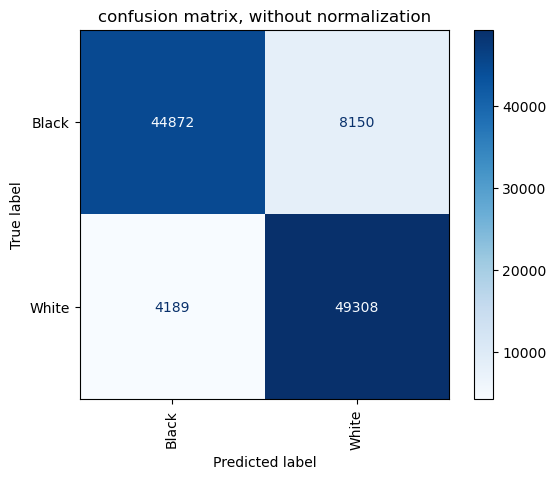

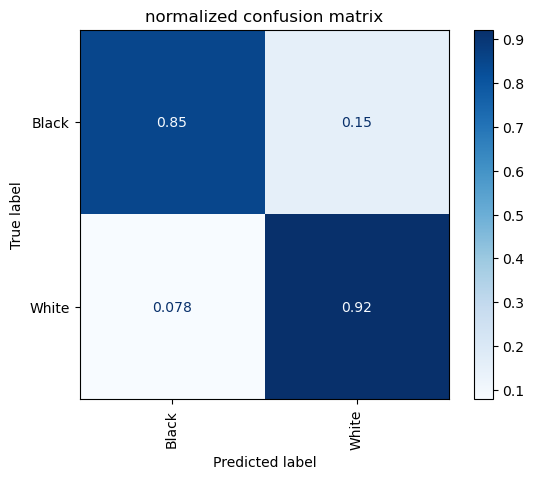

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
import time


"""(biased) multi-layer perceptron algorithm training script"""

murder_data = pd.read_csv("database.csv", low_memory=False)

murder_data.rename(columns={"Record ID":"Record_ID","Agency Code":"Agency_Code","Agency Name":"Agency_Name","Agency Type":"Agency_Type","Crime Type":"Crime_Type",
                   "Crime Solved":"Crime_Solved", "Victim Sex":"Victim_sex", "Victim Age":"Victim_Age","Victim Ethnicity":"Victim_Ethnicity","Victim Race":"Victim_Race",
                   "Perpetrator Age":"Perpetrator_Age","Perpetrator Sex":"Perpetrator_Sex","Perpetrator Race":"Perpetrator_Race","Perpetrator Ethnicity":"Perpetrator_Ethnicity","Victim Count":"Victim_Count",
                   "Perpetrator Count":"Perpetrator_Count", "Record Source":"Record_Source"},inplace=True)

# update the data to only contain black and white perps and victims
bias = ["Black", "White"]
murder_data = murder_data[(murder_data["Victim_Race"].isin(bias)) & (murder_data["Perpetrator_Race"].isin(bias))]

enc = LabelEncoder()
X = pd.get_dummies(murder_data[["Victim_Race"]])
y = enc.fit_transform(murder_data["Perpetrator_Race"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

start = time.time()

# neural network, multi-layer perceptron
model = MLPClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

end = time.time()

duration = end - start

mlp_score = accuracy_score(y_test, predictions)

report = classification_report(y_test, predictions)
print(report)

print(f"the multi-layer perceptron model has roughly {100*mlp_score:,.2f}% accuracy in predicting killer's race based on the victim's race\n")

print("Number of mislabeled murders out of a total %d murders: %d"
      % (X_test.shape[0], (y_test != predictions).sum()))

print()

print(f"model predictions took {duration:.2f} seconds to compute.")

labels = enc.inverse_transform(range(len(enc.classes_)))

titles_options = [
    ("confusion matrix, without normalization", None),
    ("normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=labels,
        cmap=plt.cm.Blues,
        normalize=normalize,
        xticks_rotation="vertical"
    )
    disp.ax_.set_title(title)   

print("the indices on the diagonal from top-left to bottom-right in the graph are correct predictions")
plt.show()






In [34]:
vic_counts = murder_data["Victim_Race"].value_counts()

# get minimum count of samples across all races
min_vic_count = vic_counts.min()


# resample races to have the same number of samples as min_vic_count
resampled_dfs = []
for v in vic_counts.index:
    df_v = murder_data[murder_data["Victim_Race"] == v]
    resampled_v = df_v.sample(n=min_vic_count, replace=True)
    resampled_dfs.append(resampled_v)

# add resampled dfs back into a single df
balanced_df = pd.concat(resampled_dfs)

# balanced victim count
print(balanced_df.Victim_Race.value_counts())
print()
      
# show perp count of balanced victim df
balanced_df.Perpetrator_Race.value_counts()


White                            4567
Black                            4567
Asian/Pacific Islander           4567
Unknown                          4567
Native American/Alaska Native    4567
Name: Victim_Race, dtype: int64



Unknown                          8122
White                            5874
Black                            4828
Native American/Alaska Native    2115
Asian/Pacific Islander           1896
Name: Perpetrator_Race, dtype: int64

              precision    recall  f1-score   support

           0       0.91      0.86      0.89     41324
           1       0.86      0.91      0.88     37181

    accuracy                           0.89     78505
   macro avg       0.89      0.89      0.89     78505
weighted avg       0.89      0.89      0.89     78505

the stochastic gradient descent model has roughly 88.66% accuracy in predicting killer's race based on the victim's race


model predictions took 0.11 seconds to compute.

Balancing the data counts of black and white victims does not seem to further improve the prediction accuracy
the indices on the diagonal from top-left to bottom-right in the graph are correct predictions


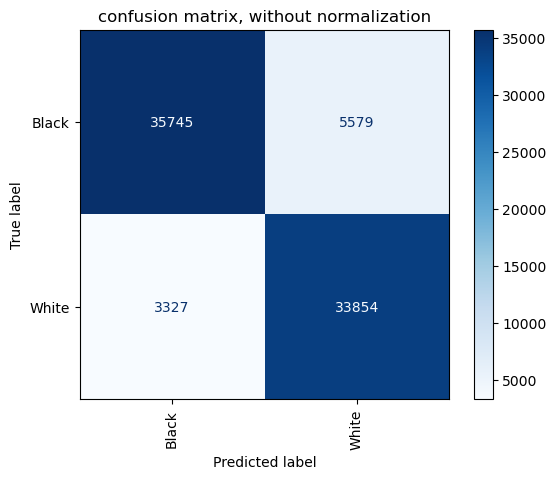

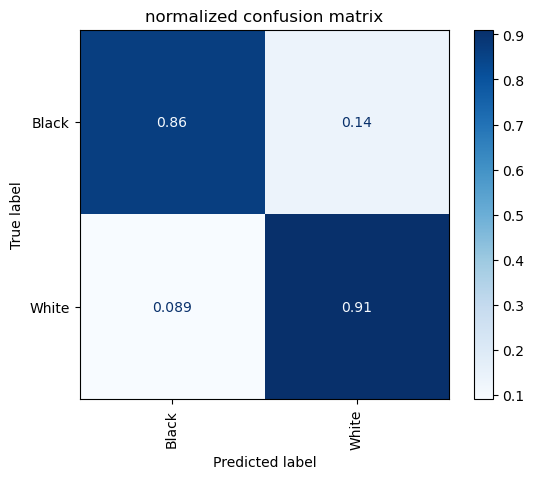

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


"""Stochastic Gradient Descent training script, using balanced data of only black and white races"""

murder_data = pd.read_csv("database.csv", low_memory=False)

murder_data.rename(columns={"Record ID":"Record_ID","Agency Code":"Agency_Code","Agency Name":"Agency_Name","Agency Type":"Agency_Type","Crime Type":"Crime_Type",
                   "Crime Solved":"Crime_Solved", "Victim Sex":"Victim_sex", "Victim Age":"Victim_Age","Victim Ethnicity":"Victim_Ethnicity","Victim Race":"Victim_Race",
                   "Perpetrator Age":"Perpetrator_Age","Perpetrator Sex":"Perpetrator_Sex","Perpetrator Race":"Perpetrator_Race","Perpetrator Ethnicity":"Perpetrator_Ethnicity","Victim Count":"Victim_Count",
                   "Perpetrator Count":"Perpetrator_Count", "Record Source":"Record_Source"},inplace=True)

# use only black and white victim/perp races
bias = ["Black", "White"]
murder_data = murder_data[(murder_data["Victim_Race"].isin(bias)) & (murder_data["Perpetrator_Race"].isin(bias))]

# update data to contain an equal amount of victims of each race
vic_counts = murder_data["Victim_Race"].value_counts()

# get minimum count of samples across all races
min_vic_count = vic_counts.min()

# resample races to have the same number of samples as min_vic_count
resampled_dfs = []
for v in vic_counts.index:
    df_v = murder_data[murder_data["Victim_Race"] == v]
    resampled_v = df_v.sample(n=min_vic_count, replace=True)
    resampled_dfs.append(resampled_v)

# add resampled dfs back into a single df
balanced_df = pd.concat(resampled_dfs)


enc = LabelEncoder()
X = pd.get_dummies(balanced_df[["Victim_Race"]])
y = enc.fit_transform(balanced_df["Perpetrator_Race"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

start = time.time()

# stochastic gradient descent algorithm model
model = SGDClassifier()
    #loss="hinge", penalty="l2", max_iter=5)    

model.fit(X_train, y_train)

predictions = model.predict(X_test)

end = time.time()
duration = end - start

sgd_score = accuracy_score(y_test, predictions)

report = classification_report(y_test, predictions)
print(report)

print(f"the stochastic gradient descent model has roughly {100*sgd_score:,.2f}% accuracy in predicting killer's race based on the victim's race\n")

print()

print(f"model predictions took {duration:.2f} seconds to compute.")

print()

print("Balancing the data counts of black and white victims does not seem to further improve the prediction accuracy")

labels = enc.inverse_transform(range(len(enc.classes_)))

titles_options = [
    ("confusion matrix, without normalization", None),
    ("normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=labels,
        cmap=plt.cm.Blues,
        normalize=normalize,
        xticks_rotation="vertical"
    )
    disp.ax_.set_title(title)   

print("the indices on the diagonal from top-left to bottom-right in the graph are correct predictions")
plt.show()









In [10]:
# balanced victim count
print(balanced_df.Victim_Race.value_counts())
print()
      
# show perp count of balanced victim df
balanced_df.Perpetrator_Race.value_counts()


White    196262
Black    196262
Name: Victim_Race, dtype: int64



Black    207257
White    185267
Name: Perpetrator_Race, dtype: int64

the indices on the diagonal from top-left to bottom-right in the graph are correct predictions
              precision    recall  f1-score   support

           0       0.58      0.97      0.72       318
           1       0.90      0.69      0.78       729
           2       0.55      1.00      0.71       305
           3       0.86      0.55      0.67       813

    accuracy                           0.72      2165
   macro avg       0.72      0.80      0.72      2165
weighted avg       0.79      0.72      0.72      2165

the logistic regression model has roughly 72.19% accuracy in predicting killer's race based on the victim's race


ommitted computation-duration here since the overall data to fit into the model is much smaller
Removing unknown race data leads to a roughly 12% increase of accuracy prediction


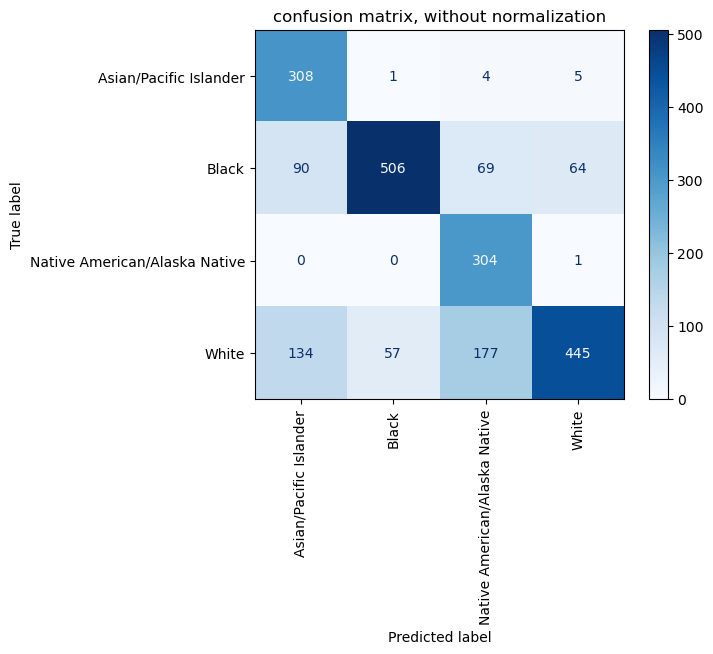

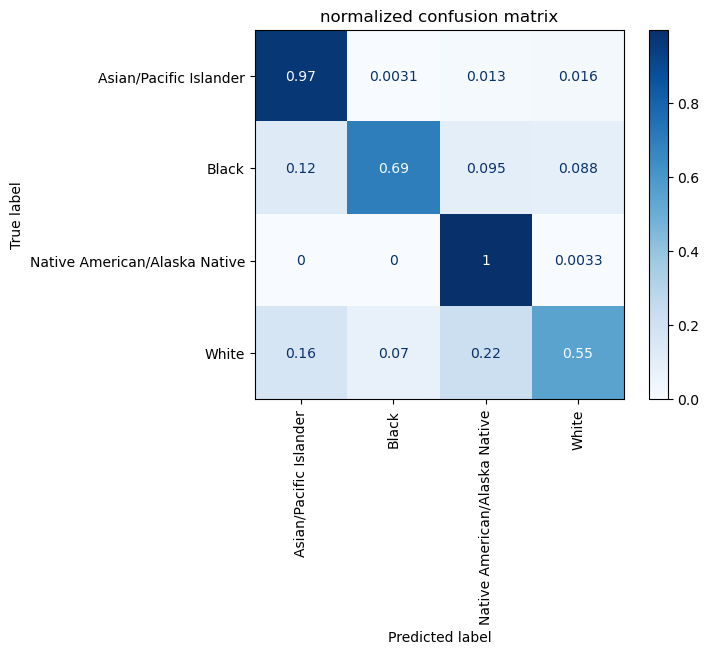

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


"""Logistic regression training script, using balanced data"""

murder_data = pd.read_csv("database.csv", low_memory=False)

murder_data.rename(columns={"Record ID":"Record_ID","Agency Code":"Agency_Code","Agency Name":"Agency_Name","Agency Type":"Agency_Type","Crime Type":"Crime_Type",
                   "Crime Solved":"Crime_Solved", "Victim Sex":"Victim_sex", "Victim Age":"Victim_Age","Victim Ethnicity":"Victim_Ethnicity","Victim Race":"Victim_Race",
                   "Perpetrator Age":"Perpetrator_Age","Perpetrator Sex":"Perpetrator_Sex","Perpetrator Race":"Perpetrator_Race","Perpetrator Ethnicity":"Perpetrator_Ethnicity","Victim Count":"Victim_Count",
                   "Perpetrator Count":"Perpetrator_Count", "Record Source":"Record_Source"},inplace=True)

# remove "unknown" from data
bias = ["Black", "White", "Asian/Pacific Islander", "Native American/Alaska Native"]
murder_data = murder_data[(murder_data["Victim_Race"].isin(bias)) & (murder_data["Perpetrator_Race"].isin(bias))]

# update data to contain an equal amount of victims of each race
vic_counts = murder_data["Victim_Race"].value_counts()

# get minimum count of samples across all races
min_vic_count = vic_counts.min()

# resample races to have the same number of samples as min_vic_count
resampled_dfs = []
for v in vic_counts.index:
    df_v = murder_data[murder_data["Victim_Race"] == v]
    resampled_v = df_v.sample(n=min_vic_count, replace=True)
    resampled_dfs.append(resampled_v)

# add resampled dfs back into a single df
balanced_df = pd.concat(resampled_dfs)


enc = LabelEncoder()
X = pd.get_dummies(balanced_df[["Victim_Race"]])
y = enc.fit_transform(balanced_df["Perpetrator_Race"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# LR algorithm model
model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("the indices on the diagonal from top-left to bottom-right in the graph are correct predictions")
plt.show()


lr_score = accuracy_score(y_test, predictions)

report = classification_report(y_test, predictions)
print(report)

print(f"the logistic regression model has roughly {100*lr_score:,.2f}% accuracy in predicting killer's race based on the victim's race\n")

print()

print("ommitted computation-duration here since the overall data to fit into the model is much smaller")

print("Removing unknown race data leads to a roughly 12% increase of accuracy prediction")

labels = enc.inverse_transform(range(len(enc.classes_)))

titles_options = [
    ("confusion matrix, without normalization", None),
    ("normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=labels,
        cmap=plt.cm.Blues,
        normalize=normalize,
        xticks_rotation="vertical"
    )
    disp.ax_.set_title(title)   






Total number of murders committed by men in database: 399541

Of which:
White                            195837
Black                            189736
Unknown                            5502
Asian/Pacific Islander             5449
Native American/Alaska Native      3017
Name: Perpetrator_Race, dtype: int64



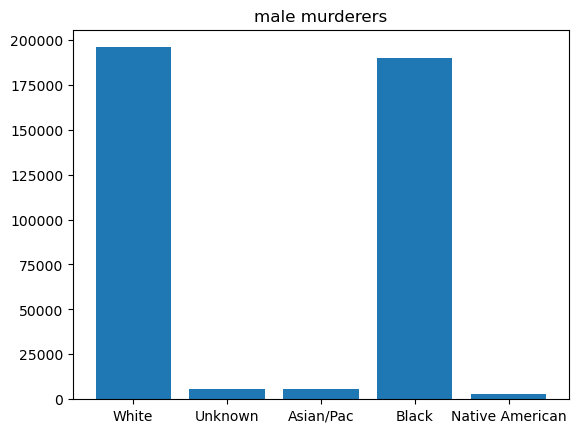

normalized:

White                            0.490155
Black                            0.474885
Unknown                          0.013771
Asian/Pacific Islander           0.013638
Native American/Alaska Native    0.007551
Name: Perpetrator_Race, dtype: float64


In [15]:
male_killer = murder_data[murder_data["Perpetrator_Sex"]=="Male"].shape[0]
print("Total number of murders committed by men in database:", male_killer)
print("")

# number of murders in database perpetrated by men going by race
print("Of which:")
print(murder_data[murder_data["Perpetrator_Sex"]=="Male"].Perpetrator_Race.value_counts())
print("")

# graph
labels = ["White", "Unknown", "Asian/Pac", "Black", "Native American"]
values = [murder_data[(murder_data["Perpetrator_Sex"] == "Male") & (murder_data["Perpetrator_Race"] == "White")].shape[0], 
murder_data[(murder_data["Perpetrator_Sex"] == "Male") & (murder_data["Perpetrator_Race"] == "Unknown")].shape[0], 
murder_data[(murder_data["Perpetrator_Sex"] == "Male") & (murder_data["Perpetrator_Race"] == "Asian/Pacific Islander")].shape[0],
murder_data[(murder_data["Perpetrator_Sex"] == "Male") & (murder_data["Perpetrator_Race"] == "Black")].shape[0],
murder_data[(murder_data["Perpetrator_Sex"] == "Male") & (murder_data["Perpetrator_Race"] == "Native American/Alaska Native")].shape[0]]

plt.title("male murderers")
plt.xlabel("")
plt.ylabel("")

plt.bar(labels, values)

# show graph
plt.show()

print("normalized:\n")
print(murder_data[murder_data["Perpetrator_Sex"]=="Male"].Perpetrator_Race.value_counts(normalize=True))





Total number of murders committed by women in database: 48548

Of which:
Black                            24648
White                            22342
Native American/Alaska Native      578
Asian/Pacific Islander             577
Unknown                            403
Name: Perpetrator_Race, dtype: int64



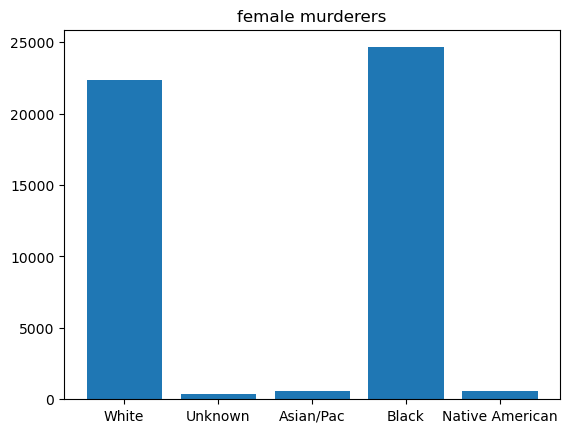

normalized:


Black                            0.507704
White                            0.460204
Native American/Alaska Native    0.011906
Asian/Pacific Islander           0.011885
Unknown                          0.008301
Name: Perpetrator_Race, dtype: float64

In [16]:
female_killer = murder_data[murder_data["Perpetrator_Sex"]=="Female"].shape[0]
print("Total number of murders committed by women in database:", female_killer)
print("")

# number of murders in database perpetrated by women going by race
print("Of which:")
print(murder_data[murder_data["Perpetrator_Sex"]=="Female"].Perpetrator_Race.value_counts())
print("")

labels = ["White", "Unknown", "Asian/Pac", "Black", "Native American"]
values = [murder_data[(murder_data["Perpetrator_Sex"] == "Female") & (murder_data["Perpetrator_Race"] == "White")].shape[0], 
murder_data[(murder_data["Perpetrator_Sex"] == "Female") & (murder_data["Perpetrator_Race"] == "Unknown")].shape[0], 
murder_data[(murder_data["Perpetrator_Sex"] == "Female") & (murder_data["Perpetrator_Race"] == "Asian/Pacific Islander")].shape[0],
murder_data[(murder_data["Perpetrator_Sex"] == "Female") & (murder_data["Perpetrator_Race"] == "Black")].shape[0],
murder_data[(murder_data["Perpetrator_Sex"] == "Female") & (murder_data["Perpetrator_Race"] == "Native American/Alaska Native")].shape[0]]

plt.title("female murderers")
plt.xlabel("")
plt.ylabel("")

plt.bar(labels, values)

plt.show()

print("normalized:")
murder_data[murder_data["Perpetrator_Sex"]=="Female"].Perpetrator_Race.value_counts(normalize=True)

In [2]:
# total amount of murders in murder database (rows in database)
total_murders = murder_data.shape[0]
print("Total rows of data in database:", total_murders)


Total rows of data in database: 638454
